<h2><b>import libraries</b></h2>

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
import pickle

from tensorflow.keras.layers import Input, Dense, add
from tensorflow.keras.models import Model

from pygam import GAM, s, f

<h2><b>pre-processing data</b></h2>

In [16]:
data = pd.read_csv("playR_concattransformed_all.csv", index_col=0)

In [17]:
data.columns

Index(['KLF10', 'CD19', 'CD5', 'MYC', 'CD83', 'IgD', 'NR4A2', 'PPP1R15A',
       'JUND', 'FOSB', 'CD21', 'RGS1', 'CD27', 'KLF6', 'CD22', 'TCL1A',
       'DDIT3', 'Ki67', 'YPEL5', 'HSPA5', 'TXNIP', 'CD38', 'RGS2', 'EGR1',
       'IgM', 'CD69', 'FOS', 'CXCR4', 'Actin', 'labels'],
      dtype='object')

In [18]:
y_of_model = "Ki67"
drop_other_columns = ['KLF10','MYC', 'JUND', 'FOSB',  'RGS1',  'KLF6',  'TCL1A', 'PPP1R15A',
                      'DDIT3', 'YPEL5', 'HSPA5', 'TXNIP', 'RGS2', 'EGR1','NR4A2',
                         'FOS', 'Actin', 'CD83',]
drop_string = "labels"
scaler = MinMaxScaler()
data = data.drop(drop_string, axis = 1)
data2 = data
data2 = scaler.fit_transform(data)
data2 = pd.DataFrame(data2, columns = data.columns)
data3 = data2.sort_values(y_of_model)

X = data2.drop(y_of_model, axis=1)
X = X.drop(drop_other_columns, axis = 1)
y = data2[y_of_model]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=True, random_state=40)

In [19]:
data3.head()

,KLF10,CD19,CD5,MYC,CD83,IgD,NR4A2,PPP1R15A,JUND,FOSB,...,HSPA5,TXNIP,CD38,RGS2,EGR1,IgM,CD69,FOS,CXCR4,Actin
286635,0.000000,0.590395,0.331349,0.073602,0.490876,0.015253,0.091254,0.000000,0.411375,0.024686,...,0.003033,0.311827,0.000000,0.000000,0.000000,0.107143,0.077800,0.096406,0.172553,0.473187
370358,0.132651,0.743471,0.371461,0.199512,0.468245,0.000000,0.000000,0.025790,0.039037,0.000000,...,0.006370,0.433766,0.011608,0.098101,0.371601,0.267790,0.007858,0.000000,0.063817,0.521739
106783,0.012985,0.559899,0.243686,0.031984,0.263768,0.047827,0.000000,0.063244,0.313337,0.000000,...,0.000000,0.477251,0.000000,0.000000,0.010815,0.006199,0.000000,0.000989,0.280781,0.356151
642105,0.208522,0.075780,0.284150,0.000000,0.033254,0.069920,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.014011,0.131794,0.000000,0.000000,0.000000,0.000000,0.099469,0.019393
207066,0.016131,0.559012,0.357528,0.261725,0.551807,0.148363,0.000000,0.158101,0.170101,0.004315,...,0.000000,0.382632,0.000000,0.004958,0.000000,0.227541,0.018353,0.000000,0.141200,0.000000


<h2><b>Neural Network with skip connection</b></h2>

In [39]:
inputs = Input(shape=(X_train.shape[1],))

x = Dense(units=64, activation='relu')(inputs)
w = Dense(units=64, activation='relu')(x)
y = Dense(units=28, activation='relu')(w)
z = add([y, inputs])

w = Dense(units=64, activation='relu')(z)
y = Dense(units=28, activation='relu')(w)
z = add([y, z])

outputs = Dense(units=1, activation='sigmoid')(z)
model = Model(inputs=inputs, outputs=outputs)

In [42]:
lr = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss= "mean_absolute_error")
model.fit(X_train, y_train, epochs=40, batch_size=100)

Epoch 1/40
3839/3839 [==============================] - 7s 2ms/step - loss: 0.0464
Epoch 2/40
3839/3839 [==============================] - 7s 2ms/step - loss: 0.0459
Epoch 3/40
3839/3839 [==============================] - 8s 2ms/step - loss: 0.0457
Epoch 4/40
3839/3839 [==============================] - 8s 2ms/step - loss: 0.0456
Epoch 5/40
3839/3839 [==============================] - 8s 2ms/step - loss: 0.0455
Epoch 6/40
3839/3839 [==============================] - 9s 2ms/step - loss: 0.0454
Epoch 7/40
3839/3839 [==============================] - 9s 2ms/step - loss: 0.0454
Epoch 8/40
3839/3839 [==============================] - 7s 2ms/step - loss: 0.0453
Epoch 9/40
3839/3839 [==============================] - 7s 2ms/step - loss: 0.0453
Epoch 10/40
3839/3839 [==============================] - 7s 2ms/step - loss: 0.0452
Epoch 11/40
3839/3839 [==============================] - 7s 2ms/step - loss: 0.0452
Epoch 12/40
3839/3839 [==============================] - 7s 2ms/step - loss: 0.0451
E

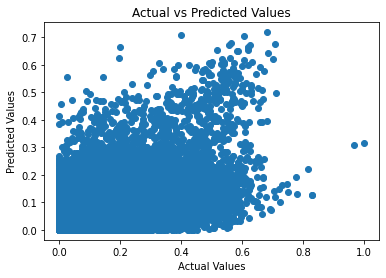

In [43]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

<h2><b>Neural Network</b></h2>

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [9]:
lr = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss= "mse")
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
6143/6143 [==============================] - 8s 1ms/step - loss: 0.0041
Epoch 2/10
6143/6143 [==============================] - 8s 1ms/step - loss: 0.0040
Epoch 3/10
6143/6143 [==============================] - 8s 1ms/step - loss: 0.0040
Epoch 4/10
6143/6143 [==============================] - 9s 1ms/step - loss: 0.0040
Epoch 5/10
6143/6143 [==============================] - 9s 1ms/step - loss: 0.0040
Epoch 6/10
6143/6143 [==============================] - 9s 1ms/step - loss: 0.0040
Epoch 7/10
6143/6143 [==============================] - 9s 1ms/step - loss: 0.0040
Epoch 8/10
6143/6143 [==============================] - 9s 1ms/step - loss: 0.0040
Epoch 9/10
6143/6143 [==============================] - 9s 1ms/step - loss: 0.0039
Epoch 10/10
6143/6143 [==============================] - 9s 2ms/step - loss: 0.0039


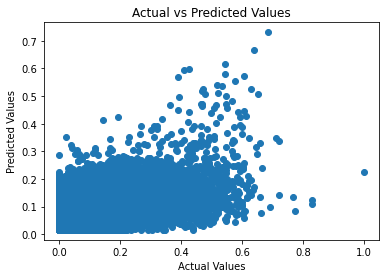

In [10]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

<h2><b>RANDOM FOREST</b></h2>

In [23]:
# Fit the decision tree regression model
model_depths = [15] 
n_estimators = [17]
for n_estimator in n_estimators:
    for model_depth in model_depths:
        model = RandomForestRegressor(n_estimators=n_estimator, max_depth=model_depth)  # Set the maximum depth of the tree to 3
        model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = model.predict(X_test)

        # Evaluate the model using mean squared error
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        print(f" estimator number %s - model_depth %s MSE %s MAE %s MAPE %s" %(n_estimator, model_depth, mse, mae, mape), )

 estimator number 17 - model_depth 15 MSE 0.004285657888822317 MAE 0.04934813397992446 MAPE 45444236291236.9


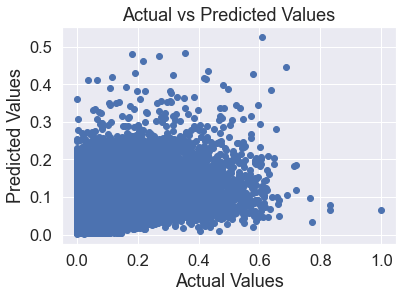

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [6]:
feature_imp = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(
       ascending = False)

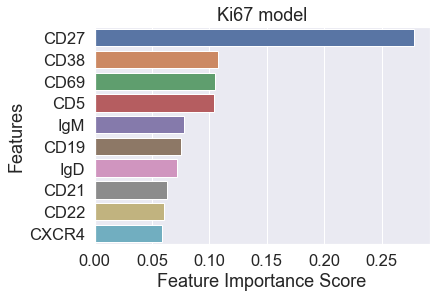

In [7]:
sns.set(rc = {"figure.figsize":(8,6)})
sns.set(font_scale = 1.5)
sns.barplot(x= feature_imp, y= feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title(y_of_model + " model")
plt.show()

In [8]:
with open(f'random_forest_estimator_%s_depth_%s_model.pkl' %(n_estimator, model_depth), 'wb') as file:
    pickle.dump(model, file)

<h2><b>Lasso</b></h2>

In [24]:
model = LinearRegression()  # Set the regularization strength to 0.1
model.fit(X_train, y_train, sample_weight = y_train*1000)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.007534609250410563


In [25]:
coefficients = model.coef_
coefficients

array([ 0.0557808 , -0.04105917,  0.02649939,  0.03126026,  0.03191187,
       -0.01227725,  0.0098176 ,  0.01612368,  0.00274514,  0.00923975,
       -0.00316783,  0.0619413 ,  0.05484088,  0.00997617,  0.00229009,
       -0.01648082,  0.05475878,  0.04861025,  0.03097724, -0.01580276,
        0.08899529,  0.00665912, -0.01794567,  0.02423688,  0.01923966,
        0.03246099, -0.01734239,  0.0774298 ])

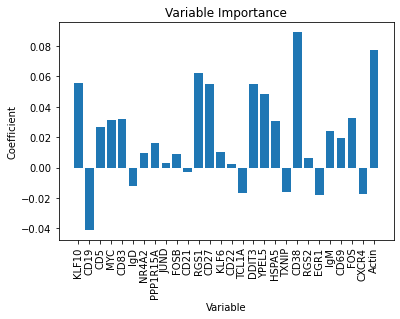

In [26]:
# Get the coefficients and variable names
coefficients = model.coef_
variables = X.columns.tolist()

# Create a bar plot of the coefficients
plt.bar(variables, coefficients)

# Set the title and axis labels
plt.title("Variable Importance")
plt.xlabel("Variable")
plt.ylabel("Coefficient")

# Rotate the x-axis labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()

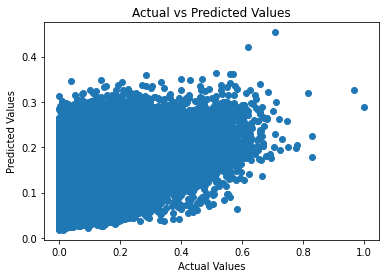

In [27]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

### Generalized Additive Model

In [29]:
gam = GAM(s(0) + s(1) +s(2) + s(3) + s(4) +
         s(5) + s(6) +s(7) + s(8) + s(9),
         max_iter = 200, loss='log')

gam.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument loss

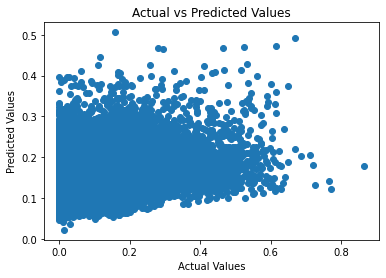

In [28]:
y_pred_train = gam.predict(X_train)
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [21]:
y_pred = gam.predict(X_test)
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.00440239162435132


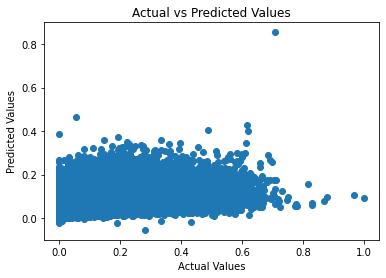

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

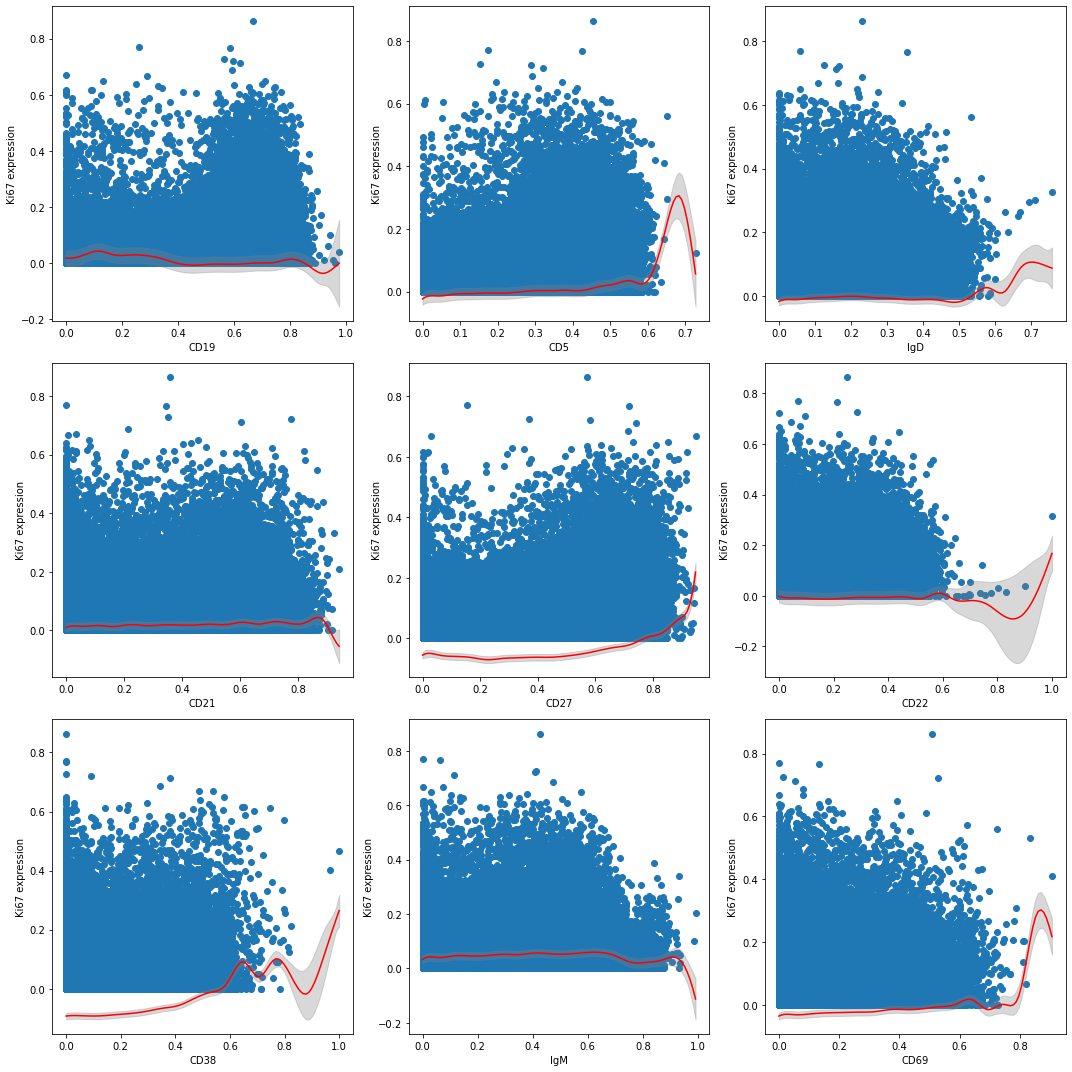

In [39]:
l = 3
m = len(X_train.columns) // l
fig, axs = plt.subplots(m, l, figsize=(5 * l, 5 * m))

k = 0
for i in range(m):
    for j in range(l):
        XX = gam.generate_X_grid(term=k)
        partial_dep, confidence_intervals = gam.partial_dependence(term=k, X=XX, width=0.95)
        axs[i][j].plot(XX[:, k], partial_dep, color="red")
        axs[i][j].scatter(X_train.iloc[:, k], y_train)
        axs[i][j].fill_between(XX[:, k], confidence_intervals[:, 0], confidence_intervals[:, 1], alpha=0.3, color="gray")
        axs[i][j].set_xlabel(X_train.columns[k])
        axs[i][j].set_ylabel('Ki67 expression')
        k += 1

plt.tight_layout()
plt.show()


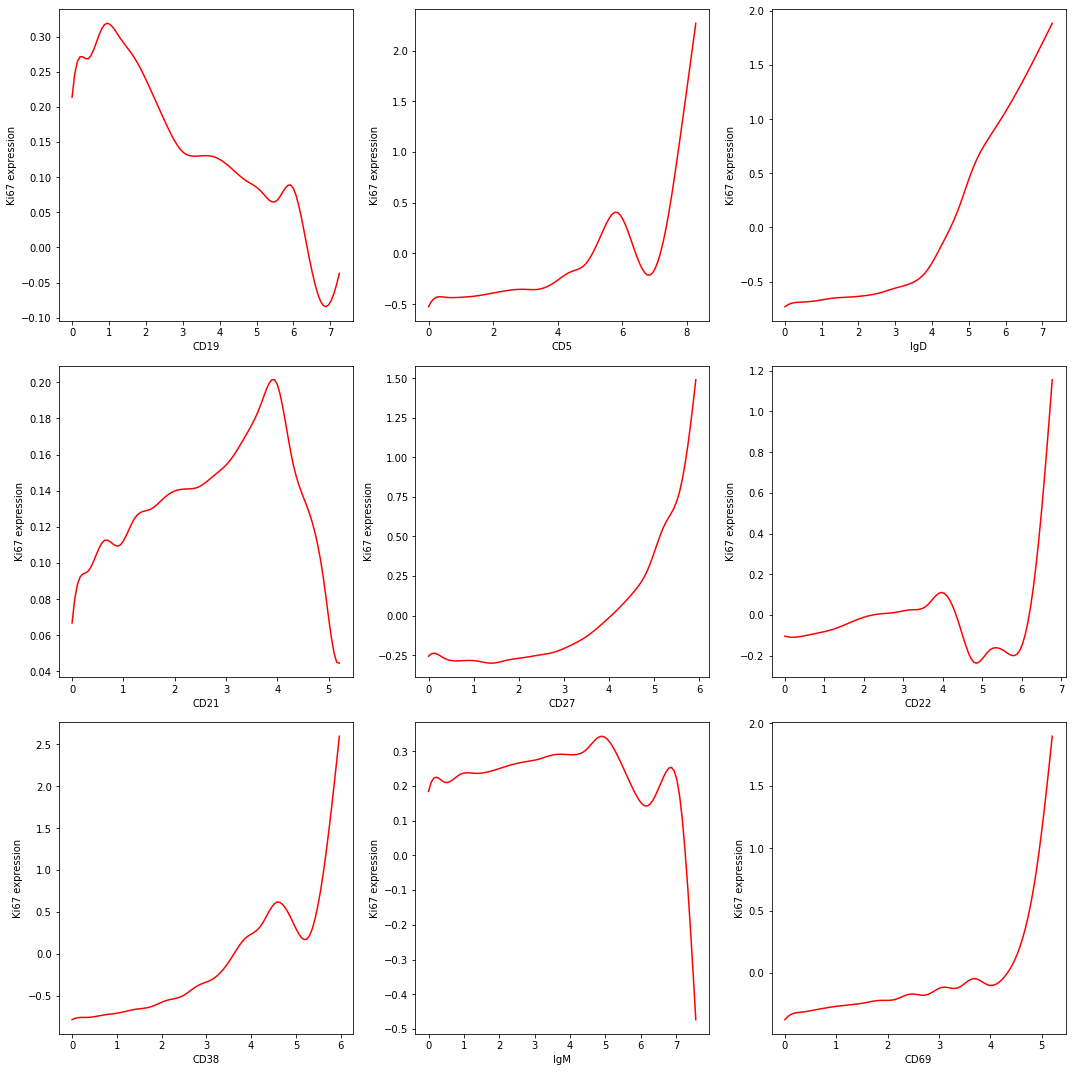

In [14]:
l= 3
m = len(X_train.columns)//l
fig, axs = plt.subplots(m, l, figsize=(5*l, 5*m))

k = 0
for i in range(m):
    for j in range(l):
        XX = gam.generate_X_grid(term=k)
        partial_dep = gam.partial_dependence(term=k, X=XX)
        axs[i][j].plot(XX[:, k], partial_dep, color = "red")
        axs[i][j].set_xlabel(X_train.columns[k])
        axs[i][j].set_ylabel('Ki67 expression')
        k+= 1

plt.tight_layout()
plt.show()